In [1]:
import matplotlib
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np
import plotly.graph_objs as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
%matplotlib inline

In [2]:
data = pd.read_csv('citation_sentiment_corpus.txt', sep="\t", header=None)
data.columns = ["Source_Paper_ID", "Target_Paper_ID", "Sentiment", "Citation_Text"]


In [5]:
data.to_csv(r'CItation.csv', index = False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 4 columns):
Source_Paper_ID    8736 non-null object
Target_Paper_ID    8736 non-null object
Sentiment          8736 non-null object
Citation_Text      8736 non-null object
dtypes: object(4)
memory usage: 273.1+ KB


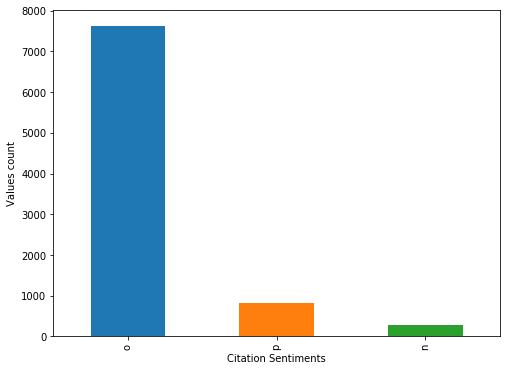

In [5]:
# multiple line plot
fig, ax = plt.subplots(figsize=(8,6))
#plt.rcParams['axes.labelweight'] = 'bold'
data.Sentiment.value_counts().plot(kind = 'bar',ax=ax)
plt.xlabel('Citation Sentiments')
plt.ylabel('Values count')
plt.savefig('nationality1.pdf')
plt.show()

In [6]:
data.Sentiment.value_counts()

o    7627
p     829
n     280
Name: Sentiment, dtype: int64

In [6]:
ndf= data.groupby('Sentiment').head(280)
df = ndf.loc[ndf['Sentiment'].isin(['o','p','n'])]
df.head(2)

,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
0,A00-1043,A00-2024,o,We analyzed a set of articles and identified s...
1,H05-1033,A00-2024,o,Table 3: Example compressions Compression AvgL...


In [18]:
df.Sentiment.value_counts()

n    280
p    280
o    280
Name: Sentiment, dtype: int64

In [22]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.Citation_Text, data.Sentiment, test_size=0.3, random_state=52)

In [27]:
# Balanced Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Citation_Text, df.Sentiment, test_size=0.3, random_state=52)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2) ,min_df=1, use_idf=True, smooth_idf=True)
# Vectorize the training data
X_train = vectorizer.fit_transform(X_train)
# Vectorize the test data
X_test = vectorizer.transform(X_test)

In [28]:
#balanced Vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2) ,min_df=1, use_idf=True, smooth_idf=True)
# Vectorize the training data
X_train = vectorizer.fit_transform(X_train)
# Vectorize the test data
X_test = vectorizer.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.model_selection import cross_val_score
#from xgboost import XGBClassifier, plot_importance


rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)

Random Forest
87.6001526135063


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.model_selection import cross_val_score
#BI-GRAM


rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)

Random Forest
87.94353300267073


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.model_selection import cross_val_score
# balanced BI-GRAM


rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)

Random Forest
72.61904761904762


In [25]:
#balanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.model_selection import cross_val_score
#from xgboost import XGBClassifier, plot_importance


rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)

Random Forest
75.0


In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [4]:
#balanced Vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2) ,min_df=1, use_idf=True, smooth_idf=True)
# Vectorize the training data
SmoteVector = vectorizer.fit_transform(data.Citation_Text)
# Vectorize the test data
#X_test = vectorizer.transform(X_test)
X=SmoteVector
y=data.Sentiment
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [5]:
# Smote Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [34]:
#smote

rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)

Random Forest
97.29060451565914


In [6]:
#smote for ROC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)

Random Forest
97.523670793882


In [22]:
#smote for ROC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators=200, random_state=52)
predETC = ETC.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, predETC)*100)

Random Forest
98.35396941005098


In [38]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = rfc.predict_proba(X_test)
pred_prob2 = ETC.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)

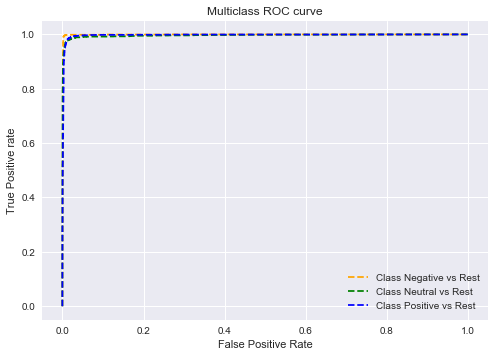

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# fit model
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, random_state=52))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass Random Forest ROC',dpi=300);

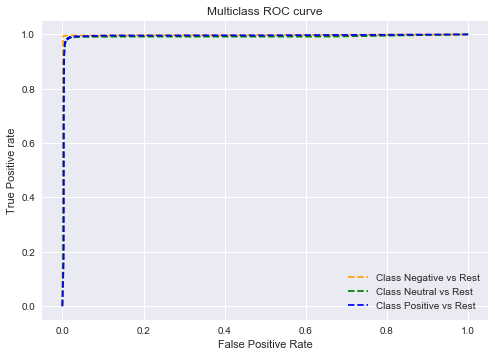

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# fit model
clf = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=200, random_state=52))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass Extra Tree ROC',dpi=300);

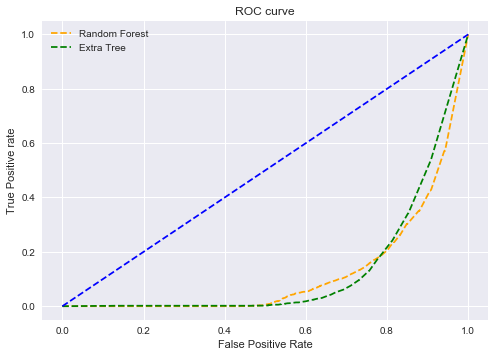

In [36]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Extra Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();

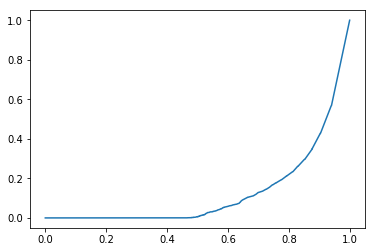

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt
# Use predict_proba to predict probability of the class
y_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.savefig('ROCNeg.png', format='png')
plt.show() 


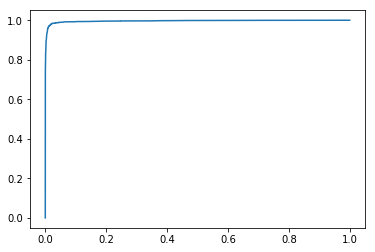

In [35]:
from sklearn import metrics
# Use predict_proba to predict probability of the class
y_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

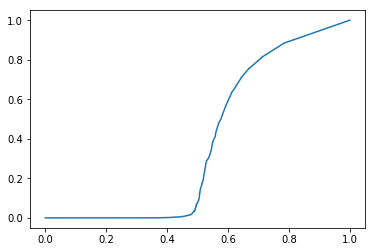

In [46]:
from sklearn import metrics
# Use predict_proba to predict probability of the class
y_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

# Print ROC curve
plt.plot(fpr,tpr)
plt.savefig('ROCOther.png', format='png')
plt.show() 

In [9]:
# Use predict_proba to predict probability of the class
y_pred = rfc.predict_proba(X_test)[:,1]

In [21]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



IndexError: too many indices for array

In [20]:
#reshape the predicted labels and convert type
y_pred = pred.argmax(axis=-1)
y_pred = pred.astype('int32')

In [19]:
#smote bi-gram

rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)

Random Forest
97.6693372177713


In [37]:
data.head(5)

,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
0,A00-1043,A00-2024,o,We analyzed a set of articles and identified s...
1,H05-1033,A00-2024,o,Table 3: Example compressions Compression AvgL...
2,I05-2009,A00-2024,o,5.3 Related works and discussion Our two-step ...
3,I05-2009,A00-2024,o,(1999) proposed a summarization system based o...
4,I05-2009,A00-2024,o,We found that the deletion of lead parts did n...


In [36]:
score=[0.02049801, 0.0376158 , 0.03523146, 0.01533165, 0.0360122 ,
       0.01610212, 0.05275264, 0.01366314, 0.03161356, 0.15209729,
       0.19167799, 0.13677685, 0.08701766, 0.04242982, 0.02321972,
       0.1079601 ]
Chi_score=[3.845744324227531e-08,2.2782875738407628e-06,1.3131734018296024e-06,0.13485423396446766,0.048341443266402634,0.3079536942594841,0.0033248220968402657,0.02286743669274219,4.59970336036713e-18,1.5442296971798973e-21,0.0012026967714810885,9.885400678203716e-50,9.885400678203716e-50,1.0623054954920904e-15,1.7556791541055556e-17,9.885400678203716e-50]
labels=['Gender', 'Nationality', 'Place of birth', 'Stage id','Grade id','Section id', 'Topic', 'Semester','Relation', 'Raised hands','Visited resources', 'Announcements view','Discussion','Parent answering survey', 'Parent school satisfaction','Student absence days' ]

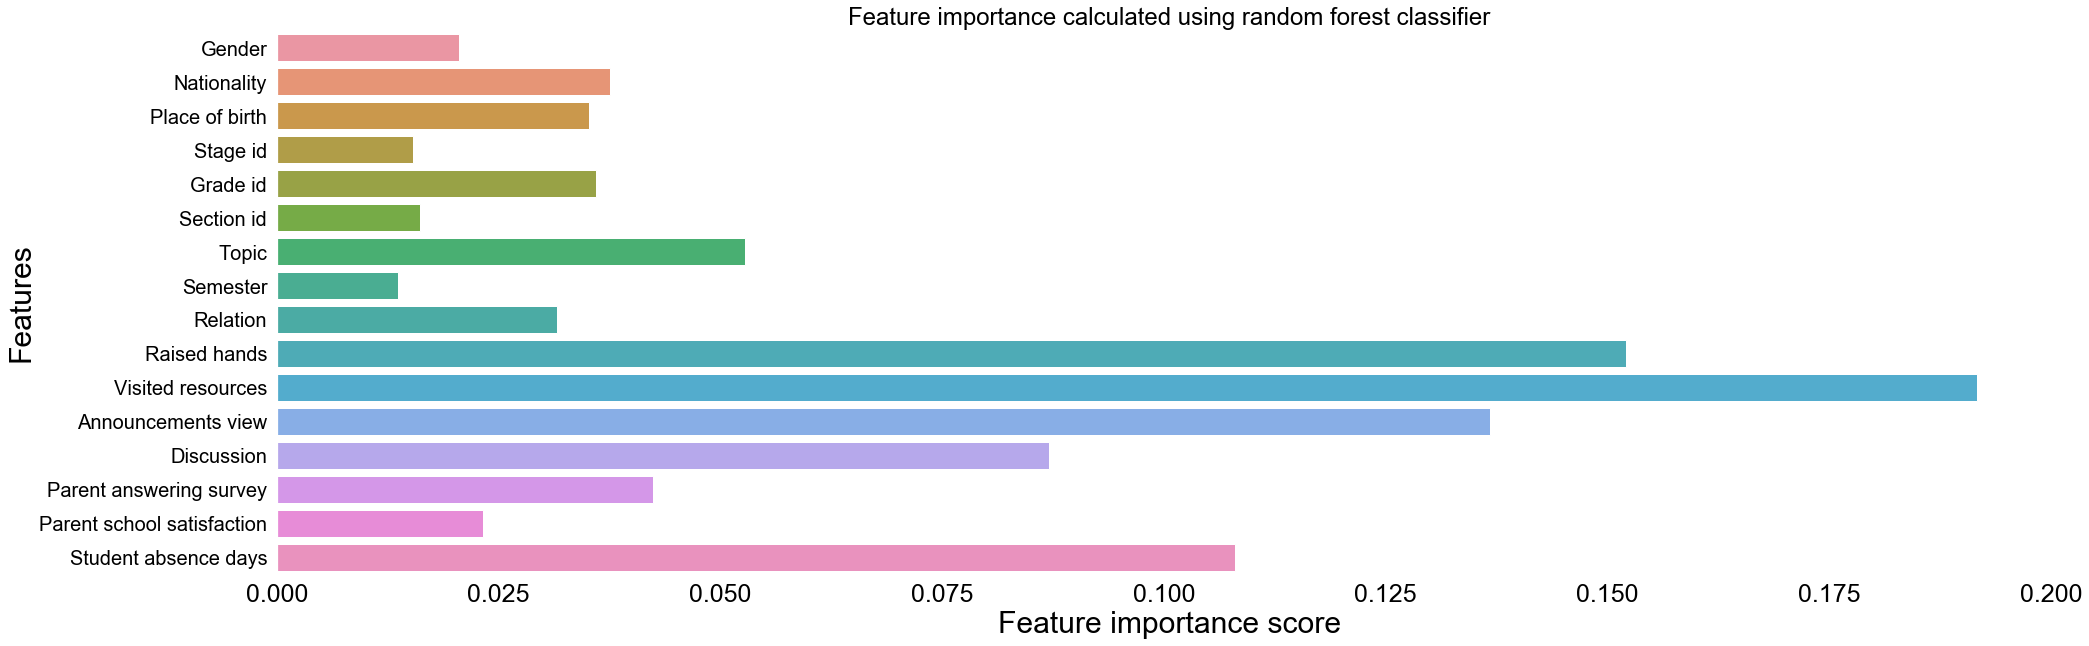

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(32.0, 10.0),
            'xtick.labelsize':25,
            'axes.titlesize' : 24,
            'font.size':20,
            'ytick.labelsize':20})
#tips = sns.load_dataset("tips")
ax = sns.barplot(x=score, y=labels)
ax.set(xlabel='Feature importance score', ylabel='Features')
ax.set_title("Feature importance calculated using random forest classifier")
ax.get_figure().savefig('fig_5.png')

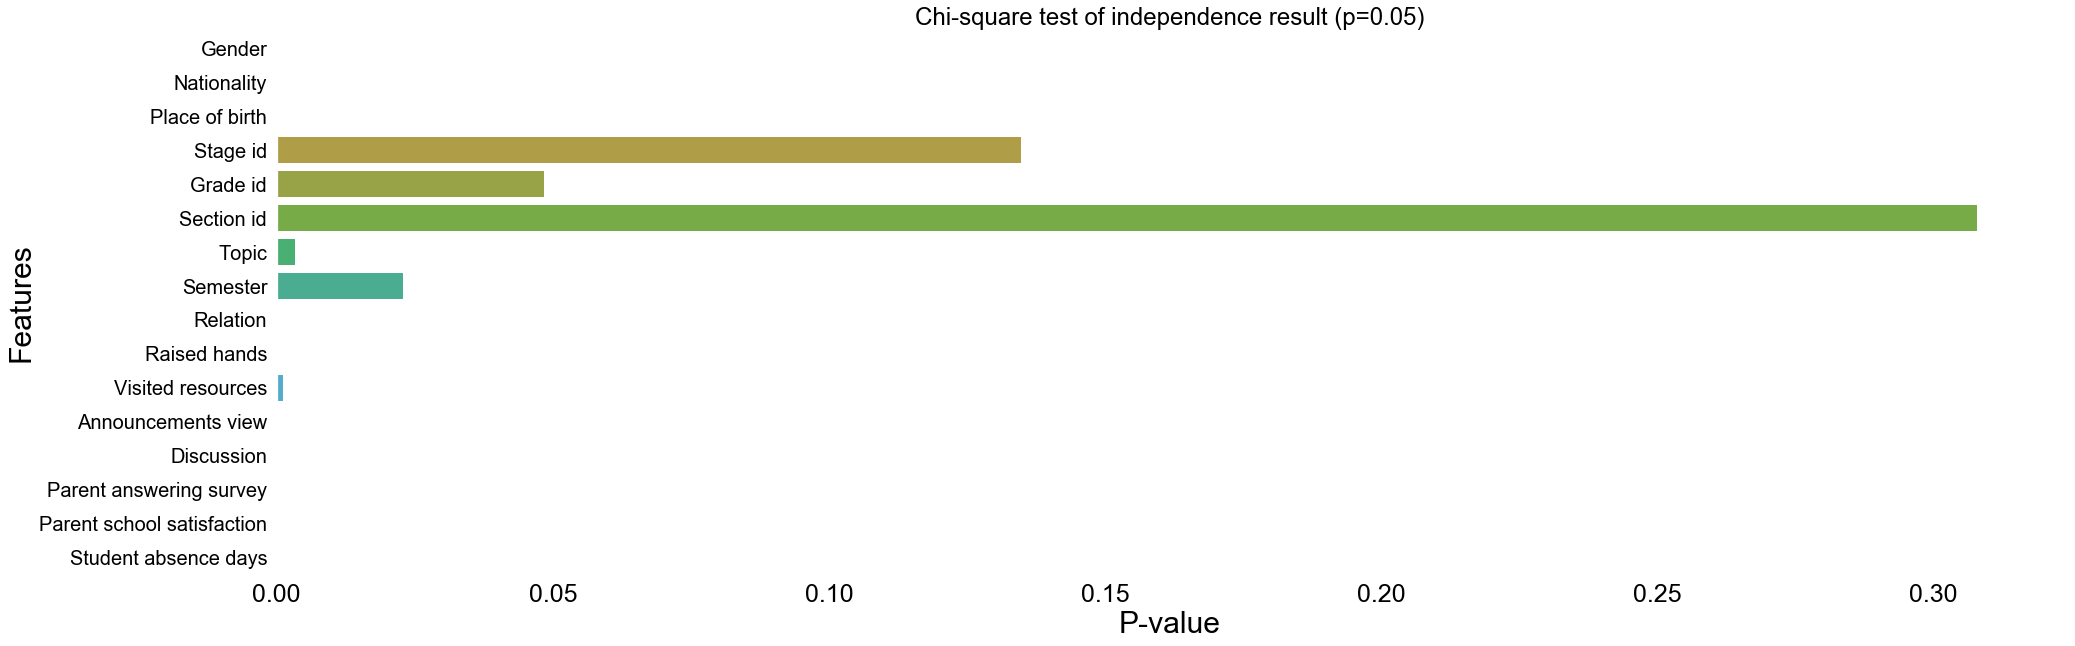

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(32.0, 10.0),
            'xtick.labelsize':25,
            'axes.titlesize' : 24,
            'font.size':20,
            'ytick.labelsize':20})
#tips = sns.load_dataset("tips")
ax = sns.barplot(x=Chi_score, y=labels)
ax.set(xlabel='P-value', ylabel='Features')
ax.set_title("Chi-square test of independence result (p=0.05)")
ax.get_figure().savefig('fig_6.png')

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.8916444105303319
              precision    recall  f1-score   support

           n       0.45      0.11      0.18        81
           o       0.91      0.98      0.94      2275
           p       0.69      0.36      0.47       265

    accuracy                           0.89      2621
   macro avg       0.68      0.48      0.53      2621
weighted avg       0.87      0.89      0.87      2621



In [10]:
#balanced
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.75
              precision    recall  f1-score   support

           n       0.71      0.70      0.71        86
           o       0.81      0.87      0.84        76
           p       0.72      0.70      0.71        90

    accuracy                           0.75       252
   macro avg       0.75      0.76      0.75       252
weighted avg       0.75      0.75      0.75       252



In [14]:
#smote
#balanced
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.9701383831026948
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2297
           1       1.00      0.92      0.96      2250
           2       0.95      0.99      0.97      2318

    accuracy                           0.97      6865
   macro avg       0.97      0.97      0.97      6865
weighted avg       0.97      0.97      0.97      6865



In [25]:
#imbalanced bi-gram
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))
#print("GB")
#a = GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=100, random_state=52)
#a_pred = a.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,a_pred))
#from sklearn.naive_bayes import GaussianNB
#print("Gaussian NB")
#gnb = GaussianNB()
#gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.8653185806943915
Decision Tree Classifier Result
0.8267836703548264
SVC
0.8828691339183518
ETC
0.8809614650896604
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.8687523845860359
Stochastic Gradient Classifier
0.8840137352155666
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.8679893170545593


In [30]:
#balanced Bi-gram
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))
#print("GB")
#a = GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=100, random_state=52)
#a_pred = a.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,a_pred))
#from sklearn.naive_bayes import GaussianNB
#print("Gaussian NB")
#gnb = GaussianNB()
#gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.6111111111111112
Decision Tree Classifier Result
0.6904761904761905
SVC
0.7698412698412699
ETC
0.7301587301587301
Logistic Regression Result
0.746031746031746
Stochastic Gradient Classifier


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.7658730158730159
Voting Classifier LR+SGD
0.75


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [20]:
#smote Bi-gram
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))
#print("GB")
#a = GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=100, random_state=52)
#a_pred = a.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,a_pred))
#from sklearn.naive_bayes import GaussianNB
#print("Gaussian NB")
#gnb = GaussianNB()
#gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.7969410050983249
Decision Tree Classifier Result
0.9254187909686817
SVC
0.9900946831755281
ETC
0.9857246904588493
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.9765477057538238
Stochastic Gradient Classifier
0.9896576839038601
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.9800436999271668


In [22]:
#imbalanced
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))
#print("GB")
#a = GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=100, random_state=52)
#a_pred = a.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,a_pred))
#from sklearn.naive_bayes import GaussianNB
#print("Gaussian NB")
#gnb = GaussianNB()
#gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.8752384586035864
Decision Tree Classifier Result
0.8473864937046929
SVC
0.8916444105303319
ETC
0.8775276611980161
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.8714231209462038
Stochastic Gradient Classifier
0.8870660053414727
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.8725677222434185


In [26]:
#balanced
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))
#print("GB")
#a = GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=100, random_state=52)
#a_pred = a.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,a_pred))
#from sklearn.naive_bayes import GaussianNB
#print("Gaussian NB")
#gnb = GaussianNB()
#gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.6547619047619048
Decision Tree Classifier Result
0.6904761904761905
SVC
0.75
ETC
0.7777777777777778
Logistic Regression Result
0.753968253968254
Stochastic Gradient Classifier
0.7698412698412699
Voting Classifier LR+SGD
0.7341269841269841


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [35]:
#smote
#balanced
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))
#print("GB")
#a = GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=100, random_state=52)
#a_pred = a.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,a_pred))
#from sklearn.naive_bayes import GaussianNB
#print("Gaussian NB")
#gnb = GaussianNB()
#gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.8361252731245448
Decision Tree Classifier Result
0.9010924981791697
SVC
0.9669337217771303
ETC
0.9826656955571741
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.9388201019664967
Stochastic Gradient Classifier
0.9631463947560087
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.9418790968681718


In [26]:
#imbalanced bi-gram
print("DT")
print(classification_report(y_test,DecisionTree))
#print("GBM")
#print(classification_report(y_test,a_pred))
#print("GNB")
#print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("SVC")
print(classification_report(y_test,y_pred))

DT
              precision    recall  f1-score   support

           n       0.10      0.09      0.09        81
           o       0.90      0.91      0.91      2275
           p       0.34      0.35      0.35       265

    accuracy                           0.83      2621
   macro avg       0.45      0.45      0.45      2621
weighted avg       0.82      0.83      0.82      2621

ETC
              precision    recall  f1-score   support

           n       0.21      0.04      0.06        81
           o       0.89      0.98      0.94      2275
           p       0.67      0.25      0.36       265

    accuracy                           0.88      2621
   macro avg       0.59      0.42      0.45      2621
weighted avg       0.85      0.88      0.85      2621

RFC
              precision    recall  f1-score   support

           n       0.25      0.04      0.06        81
           o       0.89      0.99      0.94      2275
           p       0.71      0.20      0.31       265

    accur

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           n       0.00      0.00      0.00        81
           o       0.87      1.00      0.93      2275
           p       1.00      0.01      0.01       265

    accuracy                           0.87      2621
   macro avg       0.62      0.34      0.31      2621
weighted avg       0.86      0.87      0.81      2621

SGD
              precision    recall  f1-score   support

           n       0.33      0.07      0.12        81
           o       0.90      0.98      0.94      2275
           p       0.68      0.29      0.40       265

    accuracy                           0.88      2621
   macro avg       0.64      0.45      0.49      2621
weighted avg       0.86      0.88      0.86      2621

Voting Classifier
              precision    recall  f1-score   support

           n       0.31      0.06      0.10        81
           o       0.87      1.00      0.93      2275
           p       1.00      0.01      0.01       265

In [31]:
#balanced bi-gram
print("DT")
print(classification_report(y_test,DecisionTree))
#print("GBM")
#print(classification_report(y_test,a_pred))
#print("GNB")
#print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("SVC")
print(classification_report(y_test,y_pred))

DT
              precision    recall  f1-score   support

           n       0.61      0.55      0.58        86
           o       0.80      0.89      0.84        76
           p       0.66      0.66      0.66        90

    accuracy                           0.69       252
   macro avg       0.69      0.70      0.69       252
weighted avg       0.68      0.69      0.69       252

ETC
              precision    recall  f1-score   support

           n       0.86      0.57      0.69        86
           o       0.65      0.96      0.78        76
           p       0.75      0.69      0.72        90

    accuracy                           0.73       252
   macro avg       0.75      0.74      0.73       252
weighted avg       0.76      0.73      0.72       252

RFC
              precision    recall  f1-score   support

           n       0.72      0.60      0.66        86
           o       0.73      0.93      0.82        76
           p       0.72      0.67      0.69        90

    accur

In [21]:
#smote bi-gram
print("DT")
print(classification_report(y_test,DecisionTree))
#print("GBM")
#print(classification_report(y_test,a_pred))
#print("GNB")
#print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("SVC")
print(classification_report(y_test,y_pred))

DT
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2297
           1       0.91      0.89      0.90      2250
           2       0.92      0.91      0.92      2318

    accuracy                           0.93      6865
   macro avg       0.93      0.93      0.93      6865
weighted avg       0.93      0.93      0.93      6865

ETC
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2297
           1       0.98      0.98      0.98      2250
           2       0.98      0.98      0.98      2318

    accuracy                           0.99      6865
   macro avg       0.99      0.99      0.99      6865
weighted avg       0.99      0.99      0.99      6865

RFC
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2297
           1       0.96      0.98      0.97      2250
           2       0.98      0.96      0.97      2318

    accur

In [14]:
print("DT")
print(classification_report(y_test,DecisionTree))
#print("GBM")
#print(classification_report(y_test,a_pred))
#print("GNB")
#print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           n       0.10      0.10      0.10        81
           o       0.91      0.92      0.92      2275
           p       0.47      0.42      0.45       265

    accuracy                           0.85      2621
   macro avg       0.49      0.48      0.49      2621
weighted avg       0.84      0.85      0.84      2621

ETC
              precision    recall  f1-score   support

           n       0.29      0.05      0.08        81
           o       0.88      0.99      0.93      2275
           p       0.70      0.16      0.26       265

    accuracy                           0.88      2621
   macro avg       0.63      0.40      0.43      2621
weighted avg       0.85      0.88      0.84      2621

RFC
              precision    recall  f1-score   support

           n       0.10      0.01      0.02        81
           o       0.88      0.99      0.93      2275
           p       0.72      0.15      0.24       265

    accur

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           n       0.00      0.00      0.00        81
           o       0.87      1.00      0.93      2275
           p       0.80      0.05      0.09       265

    accuracy                           0.87      2621
   macro avg       0.56      0.35      0.34      2621
weighted avg       0.84      0.87      0.82      2621

SGD
              precision    recall  f1-score   support

           n       0.56      0.06      0.11        81
           o       0.90      0.99      0.94      2275
           p       0.71      0.27      0.39       265

    accuracy                           0.89      2621
   macro avg       0.72      0.44      0.48      2621
weighted avg       0.87      0.89      0.86      2621

Voting Classifier
              precision    recall  f1-score   support

           n       0.50      0.09      0.15        81
           o       0.88      1.00      0.93      2275
           p       0.86      0.05      0.09       265

In [27]:
# balanced
print("DT")
print(classification_report(y_test,DecisionTree))
#print("GBM")
#print(classification_report(y_test,a_pred))
#print("GNB")
#print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           n       0.65      0.59      0.62        86
           o       0.76      0.86      0.80        76
           p       0.67      0.64      0.66        90

    accuracy                           0.69       252
   macro avg       0.69      0.70      0.69       252
weighted avg       0.69      0.69      0.69       252

ETC
              precision    recall  f1-score   support

           n       0.81      0.69      0.74        86
           o       0.78      0.95      0.86        76
           p       0.75      0.72      0.73        90

    accuracy                           0.78       252
   macro avg       0.78      0.79      0.78       252
weighted avg       0.78      0.78      0.77       252

RFC
              precision    recall  f1-score   support

           n       0.76      0.70      0.73        86
           o       0.72      0.91      0.80        76
           p       0.78      0.67      0.72        90

    accur

In [36]:
# Smote
print("DT")
print(classification_report(y_test,DecisionTree))
#print("GBM")
#print(classification_report(y_test,a_pred))
#print("GNB")
#print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2297
           1       0.88      0.85      0.87      2250
           2       0.89      0.90      0.89      2318

    accuracy                           0.90      6865
   macro avg       0.90      0.90      0.90      6865
weighted avg       0.90      0.90      0.90      6865

ETC
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2297
           1       0.98      0.98      0.98      2250
           2       0.98      0.98      0.98      2318

    accuracy                           0.98      6865
   macro avg       0.98      0.98      0.98      6865
weighted avg       0.98      0.98      0.98      6865

RFC
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2297
           1       0.95      0.98      0.96      2250
           2       0.98      0.96      0.97      2318

    accur

In [7]:
for feat, importance in zip(X.columns, rfc.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: gender, importance: 0.03242210988490849
feature: Topic, importance: 0.10423663206584091
feature: Relation, importance: 0.044980175024628206
feature: raisedhands, importance: 0.2245475789897519
feature: VisITedResources, importance: 0.26404966995824053
feature: Discussion, importance: 0.15156296000948996
feature: ParentAnsweringSurvey, importance: 0.05731322777349202
feature: StudentAbsenceDays, importance: 0.12088764629364793


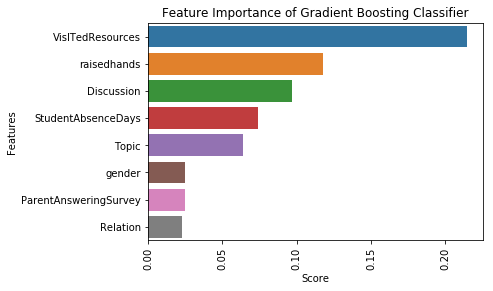

In [9]:
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Gradient Boosting Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [21]:
xgb.feature_importances_

array([0.02480324, 0.06418096, 0.02271389, 0.11762138, 0.21449791,
       0.09723961, 0.02472873, 0.07421428])

In [24]:
# make predictions for test data and evaluate
from numpy import sort
from sklearn.feature_selection import SelectFromModel
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = GradientBoostingClassifier(max_depth=10, learning_rate=0.1, n_estimators=100)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 76.39%


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.



Thresh=0.023, n=8, Accuracy: 74.31%
Thresh=0.025, n=7, Accuracy: 75.69%
Thresh=0.025, n=6, Accuracy: 68.75%
Thresh=0.064, n=5, Accuracy: 68.06%
Thresh=0.074, n=4, Accuracy: 67.36%
Thresh=0.097, n=3, Accuracy: 59.72%
Thresh=0.118, n=2, Accuracy: 62.50%
Thresh=0.214, n=1, Accuracy: 59.03%


In [26]:
#Linear Descrimination Analysis

drop_column=['Class']
X = data.drop(drop_column, axis=1)
y = data['Class']
# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), test_size=0.3, random_state=20)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=3)
clf.fit(X_train,y_train)


LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [27]:
pred_y = clf.predict(X_test)

accuracy = accuracy_score(y_test, pred_y, normalize=True, sample_weight=None)
accuracy

0.7291666666666666

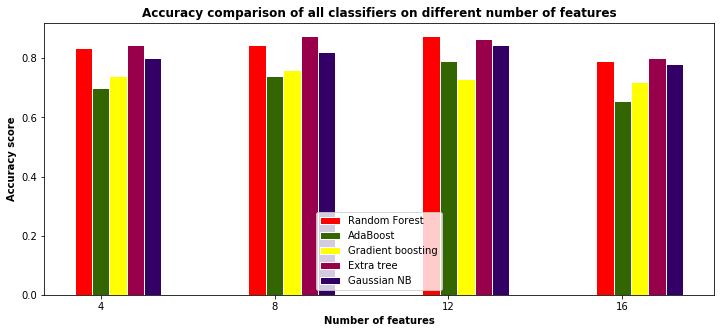

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.10
bars1  = (0.83333,0.84375,0.875,0.7910)
bars2  = (0.69791,0.73958,0.79166,0.65625)
bars3  = (0.73955,0.76041,0.72916,0.71875)
bars4  = (0.84375,0.87554,0.86458,0.80208)
bars5  = (0.80208,0.82291,0.84375,0.78125)

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.bar(r1, bars1, color='#FF0000', width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r2, bars2, color='#336600', width=barWidth, edgecolor='white', label='AdaBoost')
plt.bar(r3, bars3, color='#FFFF00', width=barWidth, edgecolor='white', label='Gradient boosting')
plt.bar(r4, bars4, color='#99004C', width=barWidth, edgecolor='white', label='Extra tree')
plt.bar(r5, bars5, color='#330066', width=barWidth, edgecolor='white', label='Gaussian NB')


# Add xticks on the middle of the group bars

plt.xlabel('Number of features', fontweight='bold')
plt.ylabel('Accuracy score', fontweight='bold')
plt.title('Accuracy comparison of all classifiers on different number of features',fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['4', '8', '12', '16'])
 
# Create legend & Show graphic
plt.rcParams["figure.figsize"] = (12.0,5.0)
plt.legend()
plt.savefig("fig_8.pdf")
plt.savefig("fig_8.png")
plt.show()


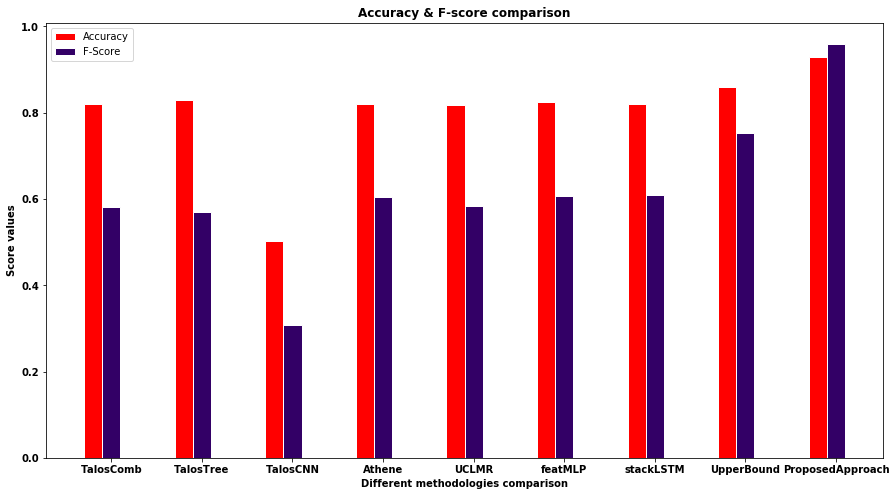

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# set width of bar
barWidth = 0.20
bars1  = (0.820,0.830,0.502,0.820,0.817,0.825,0.821,0.859,0.930)
bars2  = (0.582,0.570,0.308,0.604,0.583,0.607,0.609,0.754,0.960)


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]



#plt.xticks()
# Make the plot
plt.bar(r1, bars1, color='#FF0000', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, bars2, color='#330066', width=barWidth, edgecolor='white', label='F-Score')



# Add xticks on the middle of the group bars

plt.xlabel('Different methodologies comparison', fontweight='bold')
plt.ylabel('Score values', fontweight='bold')
plt.title('Accuracy & F-score comparison',fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['TalosComb','TalosTree','TalosCNN','Athene','UCLMR','featMLP','stackLSTM','UpperBound','ProposedApproach'], fontweight='bold')
plt.yticks(fontweight='bold')
# Create legend & Show graphic
plt.rcParams["figure.figsize"] = (15,8)
plt.legend()
plt.savefig("FNC1.pdf")
#plt.savefig("fig_8.pdf")
#plt.savefig("fig_8.png")
plt.show()

In [7]:
index

array([0, 1, 2, 3])

In [40]:
accClassifier=[]
x1=['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Extra Tree', 'Gaussian NB']
accClassifier.append(x1)
accClassifier.append(x1)
accClassifier.append(x1)
accClassifier.append(x1)
accClassifier.append(x1)

In [56]:
acclabel=[4,8,12,16]
acclabel.append(acclabel)
acclabel.append(acclabel)
acclabel.append(acclabel)
acclabel.append(acclabel)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(32.0, 10.0),
            'xtick.labelsize':25,
            'axes.titlesize' : 24,
            'font.size':20,
            'ytick.labelsize':20})
#tips = sns.load_dataset("tips")
ax = sns.barplot(y=accScore,x=acclabel,hue=accClassifier)
ax.set(xlabel='P-value', ylabel='Features')
ax.set_title("Chi-square test of independence result (p=0.05)")
#x.get_figure().savefig('fig_6.png')

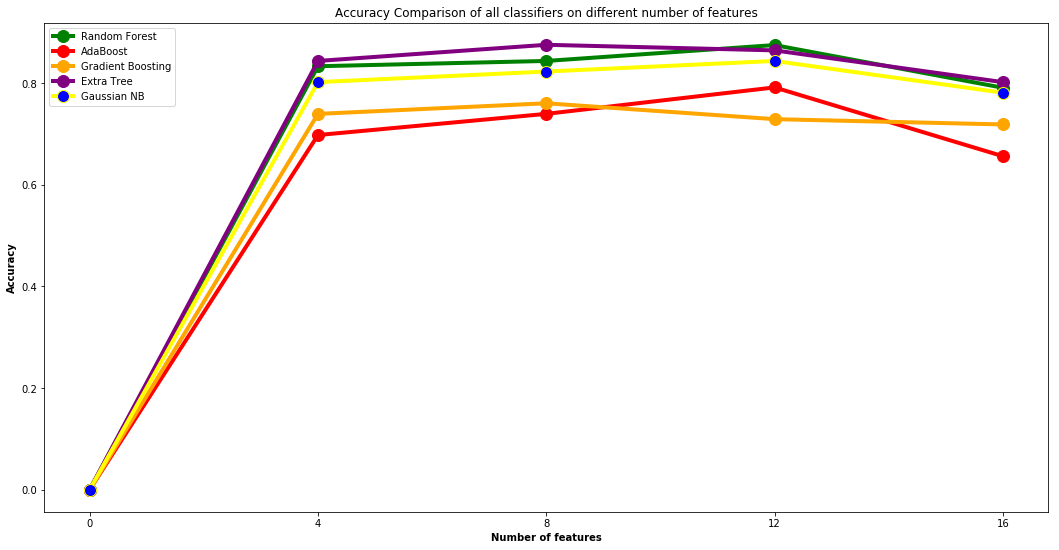

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
x1=[0,0.83333,0.84375,0.875,0.7910]
x2=[0,0.69791,0.73958,0.79166,0.65625]
x3=[0,0.73955,0.76041,0.72916,0.71875]
x4=[0,0.84375,0.87554,0.86458,0.80208]
x5=[0,0.80208,0.82291,0.84375,0.78125]
x=['0','4','8','12','16']
# Data
df=pd.DataFrame({'x': x, 'Random Forest': x1, 'AdaBoost': x2, 'Gradient Boosting': x3, 'Extra Tree': x4, 'Gaussian NB': x5})

# multiple line plot
fig, ax = plt.subplots(figsize=(18,9))
ax.set_title("Accuracy Comparison of all classifiers on different number of features")
plt.plot( 'x', 'Random Forest', data=df, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot( 'x', 'AdaBoost', data=df, marker='o', color='red', markersize=12, linewidth=4)
plt.plot( 'x', 'Gradient Boosting', data=df, marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=4)
plt.plot( 'x', 'Extra Tree', data=df, marker='o', color='purple', markersize=12, linewidth=4)
plt.plot( 'x', 'Gaussian NB', data=df, marker='o', markerfacecolor='blue', markersize=12, color='yellow', linewidth=4)
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.savefig('classifiersss1.pdf')

Text(0,0.5,'F1-score Values')

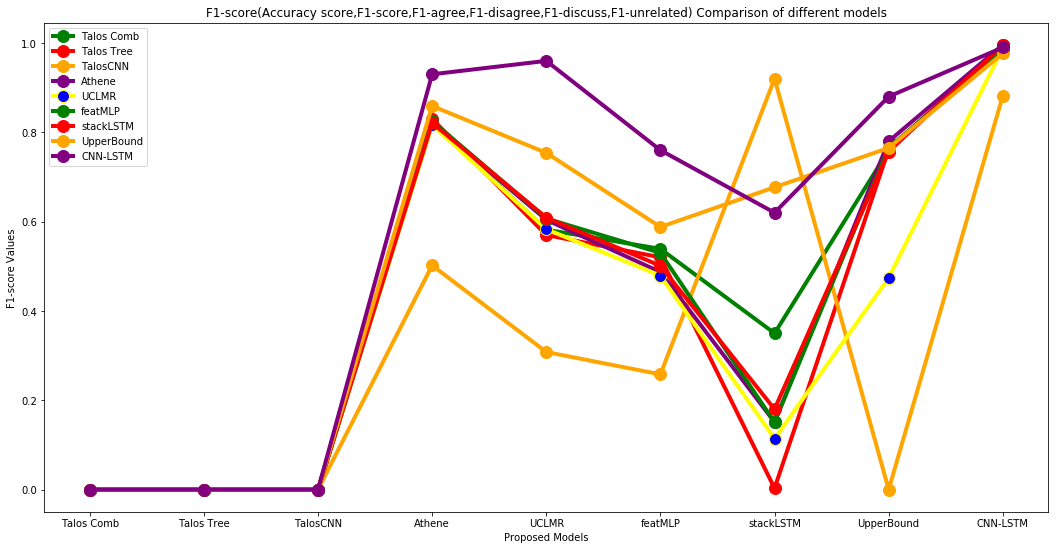

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
x1=[0,0,0,0.820,0.582,0.539,0.35,0.76,0.994]
x2=[0,0,0,0.830,0.570,0.520,0.003,0.762,0.994]
x3=[0,0,0,0.502,0.308,0.258,0.92,0.0,0.882]
x4=[0,0,0,0.820,0.604,0.487,0.151,0.780,0.996]
x5=[0,0,0,0.817,0.583,0.479,0.114,0.474,0.989]
x6=[0,0,0,0.825,0.607,0.530,0.151,0.766,0.982]
x7=[0,0,0,0.821,0.609,0.501,0.180,0.757,0.995]
x8=[0,0,0,0.859,0.754,0.588,0.677,0.765,0.977]
x9=[0,0,0,0.93,0.96,0.76,0.62,0.88,0.99]


x=['Talos Comb','Talos Tree','TalosCNN','Athene','UCLMR','featMLP','stackLSTM','UpperBound','CNN-LSTM']
# Data
df=pd.DataFrame({'x': x, 'Talos Comb': x1, 'Talos Tree': x2, 'TalosCNN': x3, 'Athene': x4, 'UCLMR': x5, 'featMLP': x6, 'stackLSTM': x7, 'UpperBound': x8, 'CNN-LSTM': x9})

# multiple line plot
fig, ax = plt.subplots(figsize=(18,9))
ax.set_title("F1-score(Accuracy score,F1-score,F1-agree,F1-disagree,F1-discuss,F1-unrelated) Comparison of different models")
plt.plot( 'x', 'Talos Comb', data=df, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot( 'x', 'Talos Tree', data=df, marker='o', color='red', markersize=12, linewidth=4)
plt.plot( 'x', 'TalosCNN', data=df, marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=4)
plt.plot( 'x', 'Athene', data=df, marker='o', color='purple', markersize=12, linewidth=4)
plt.plot( 'x', 'UCLMR', data=df, marker='o', markerfacecolor='blue', markersize=12, color='yellow', linewidth=4)
plt.plot( 'x', 'featMLP', data=df, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot( 'x', 'stackLSTM', data=df, marker='o', color='red', markersize=12, linewidth=4)
plt.plot( 'x', 'UpperBound', data=df, marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=4)
plt.plot( 'x', 'CNN-LSTM', data=df, marker='o', color='purple', markersize=12, linewidth=4)

plt.legend()
plt.xlabel('Proposed Models')
plt.ylabel('F1-score Values')
#plt.savefig('classifiersss1.pdf')

Text(0,0.5,'Accuracy')

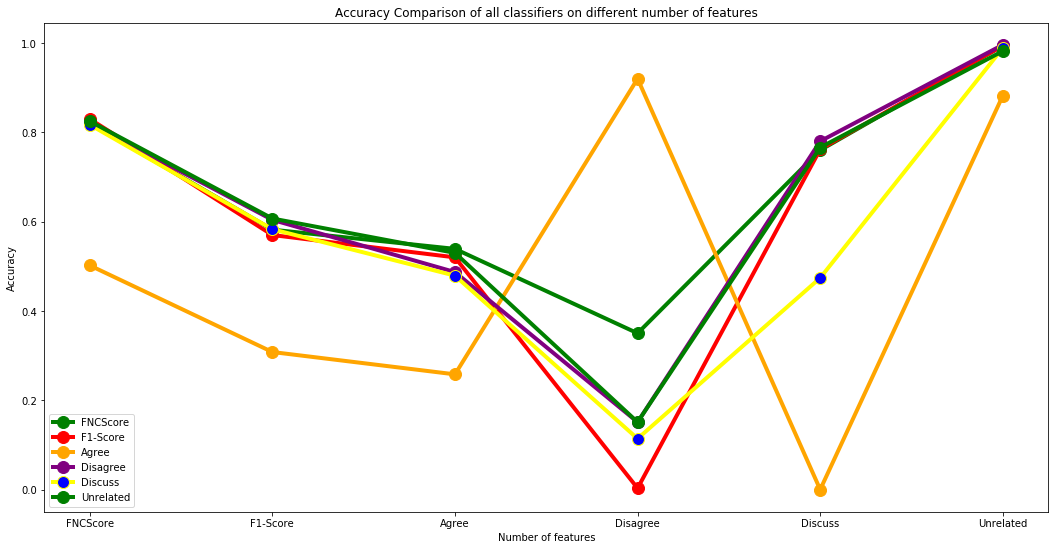

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
x1=[0.820,0.582,0.539,0.35,0.76,0.994]
x2=[0.830,0.570,0.520,0.003,0.762,0.994]
x3=[0.502,0.308,0.258,0.92,0.0,0.882]
x4=[0.820,0.604,0.487,0.151,0.780,0.996]
x5=[0.817,0.583,0.479,0.114,0.474,0.989]
x6=[0.825,0.607,0.530,0.151,0.766,0.982]
x7=[0.821,0.609,0.501,0.180,0.757,0.995]
x8=[0.859,0.754,0.588,0.677,0.765,0.977]
x9=[0.93,0.96,0.76,0.62,0.88,0.99]


x=['FNCScore','F1-Score','Agree','Disagree','Discuss','Unrelated']
# Data
df=pd.DataFrame({'x': x, 'FNCScore': x1, 'F1-Score': x2, 'Agree': x3, 'Disagree': x4, 'Discuss': x5, 'Unrelated': x6})

# multiple line plot
fig, ax = plt.subplots(figsize=(18,9))
ax.set_title("Accuracy Comparison of all classifiers on different number of features")
plt.plot( 'x', 'FNCScore', data=df, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot( 'x', 'F1-Score', data=df, marker='o', color='red', markersize=12, linewidth=4)
plt.plot( 'x', 'Agree', data=df, marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=4)
plt.plot( 'x', 'Disagree', data=df, marker='o', color='purple', markersize=12, linewidth=4)
plt.plot( 'x', 'Discuss', data=df, marker='o', markerfacecolor='blue', markersize=12, color='yellow', linewidth=4)
plt.plot( 'x', 'Unrelated', data=df, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)

plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
#plt.savefig('classifiersss1.pdf')

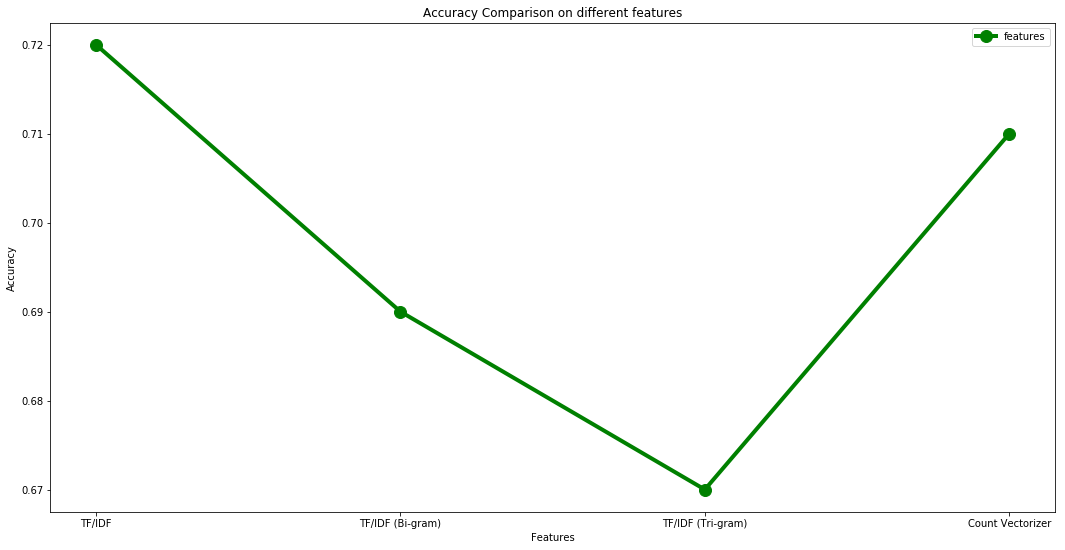

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
x1=[0.72,0.69,0.67,0.71]
x=['TF/IDF','TF/IDF (Bi-gram)','TF/IDF (Tri-gram)','Count Vectorizer']
# Data
df=pd.DataFrame({'x': x, 'features': x1})

# multiple line plot
fig, ax = plt.subplots(figsize=(18,9))
ax.set_title("Accuracy Comparison on different features")
plt.plot( 'x', 'features', data=df, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)

plt.legend()
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.savefig('accuracy comparison.pdf')

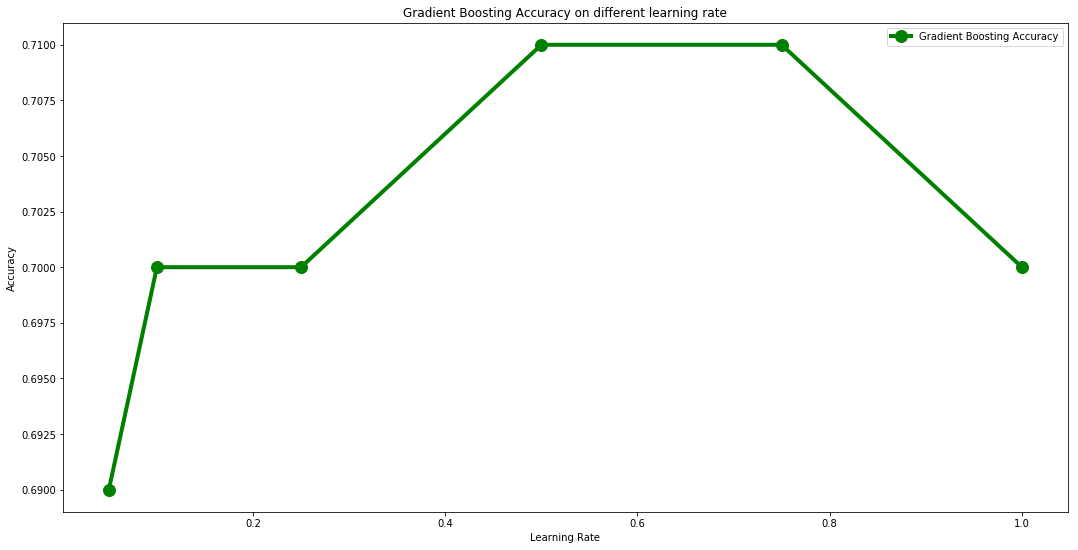

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
x1=[0.69,0.70,0.70,0.71,0.71,0.70]

x=[0.05,0.1,0.25,0.5,0.75,1.0]
# Data
df=pd.DataFrame({'x': x, 'Gradient Boosting Accuracy': x1})

# multiple line plot
fig, ax = plt.subplots(figsize=(18,9))
ax.set_title("Gradient Boosting Accuracy on different learning rate")
plt.plot( 'x', 'Gradient Boosting Accuracy', data=df, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)

plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.savefig('gbm.pdf')

In [4]:
data.head(1)

,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
0,A00-1043,A00-2024,o,We analyzed a set of articles and identified s...


In [7]:
from gensim.models import Word2Vec
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(data['Sentiment'])
data = data
tokenized_data = data['Citation_Text'].apply(lambda x: x.split())
model_w2v = Word2Vec( tokenized_data, size=200, window=5, min_count=2,sg = 1, hs = 0, negative = 10, workers= 2, seed = 34)
model_w2v.train(tokenized_data, total_examples= len(data['Citation_Text']), epochs=20)
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
        return vec
wordvec_arrays = np.zeros((len(tokenized_data), 200))
for i in range(len(tokenized_data)):
    wordvec_arrays[i,:] = word_vector(tokenized_data[i], 200)
data_feature_3 = pd.DataFrame(wordvec_arrays)
df_tex = data_feature_3
df_cat = data['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(df_tex, df_cat, test_size=0.3, random_state=2, stratify=df_cat)

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [17]:
x_test=x_test.fillna(x_test.mean())
x_train=x_train.fillna(x_train.mean())

In [19]:
from sklearn.metrics import accuracy_score,classification_report

In [20]:
#Word2Vector
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred))
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,b_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,logisticRegresion))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,predSGD))

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,predictionVC))


print("Random Forest")
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, pred)*100)

ADA
0.8553987027851965
Decision Tree Classifier Result
0.7729874093857306
SVC
0.8729492560091568
ETC
0.8752384586035864
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.876001526135063
Stochastic Gradient Classifier
0.8756199923693246
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.8744753910721099
Random Forest
87.52384586035863


In [21]:
print("DT")
print(classification_report(y_test,DecisionTree))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("SVC")
print(classification_report(y_test,y_pred))

DT
              precision    recall  f1-score   support

           n       0.06      0.08      0.07        84
           o       0.89      0.86      0.87      2288
           p       0.20      0.23      0.21       249

    accuracy                           0.77      2621
   macro avg       0.38      0.39      0.38      2621
weighted avg       0.80      0.77      0.78      2621

ETC
              precision    recall  f1-score   support

           n       0.17      0.02      0.04        84
           o       0.88      0.99      0.93      2288
           p       0.66      0.08      0.14       249

    accuracy                           0.88      2621
   macro avg       0.57      0.36      0.37      2621
weighted avg       0.84      0.88      0.83      2621

RFC
              precision    recall  f1-score   support

           n       0.12      0.01      0.02        84
           o       0.88      0.99      0.93      2288
           p       0.63      0.08      0.14       249

    accur

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

